In [9]:
import numpy as np
import matplotlib.pyplot as plt
import sounddevice as sd

### Reception du bruit

In [27]:
time = 5

#sd.get_stream()
#sd.wait()
def detect_end(signal, threshold=0.0001):
    # Utilisez le carré du signal pour calculer l'énergie
    energy = np.sum(signal**2) / len(signal)
    
    # Si l'énergie est inférieure au seuil, considérez que l'émission est terminée
    return energy < threshold

# Paramètres d'enregistrement audio
f = 44100  # Taux d'échantillonnage en Hz (standard CD)

# Enregistrement du signal jusqu'à la fin de l'émission
recording = sd.rec(int(10 * f), samplerate=f, channels=1)
sd.wait()

# Détecter la fin de l'émission
while not detect_end(recording):
    recording = sd.rec(int(1 * f), samplerate=f, channels=1)
    sd.wait()

print("Fin de l'émission détectée.")

Fin de l'émission détectée.


### Visualisation

ValueError: x and y must have same first dimension, but have shapes (220500,) and (44100, 1)

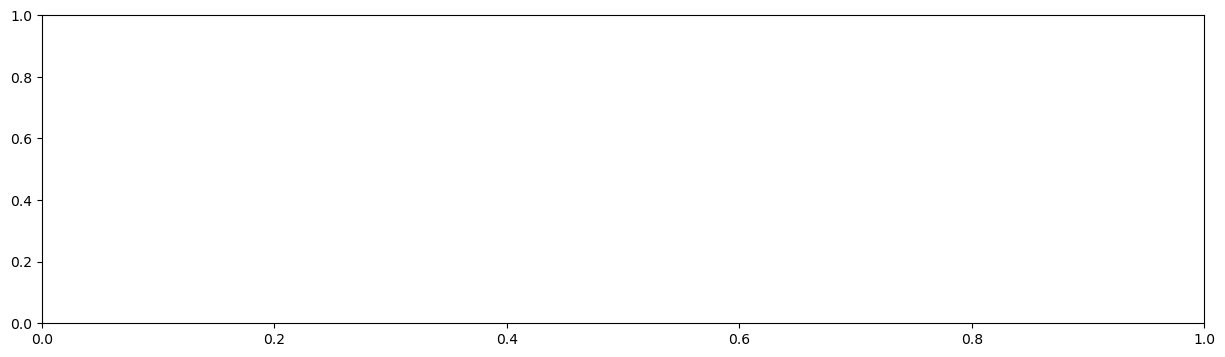

In [18]:
fig, ax = plt.subplots(1, 1, figsize=(15, 4))
t = np.linspace(0, time, int(f * time), endpoint=False)
ax.plot(t,recording)
ax.set_title('Recording')
ax.set_xlabel("Time")
ax.grid(True)
ax.set_ylabel("Amplitude")
ax.set_xlim(1,1.01060192473242)


In [8]:
x=0
for i in range(len(recording)-1):
    if recording[i] > 0:
        if recording[i+1] < 0:
            x+=1
    elif recording[i] < 0:
        if recording[i+1] >0:
            x+=1
x/=2
Te=1/f
fi = x/time
print(fi)
amplitude = (max(recording)+abs(min(recording)))/2
#amplitude*=2
print("L'amplitude max est de :",amplitude)

records = []





NameError: name 'recording' is not defined